In [2]:
!pip install plotly
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached plotly-6.1.2-py3-none-any.whl.metadata (6.9 kB)
  Using cached narwhals-1.41.1-py3-none-any.whl.metadata (11 kB)
Using cached plotly-6.1.2-py3-none-any.whl (16.3 MB)
Using cached narwhals-1.41.1-py3-none-any.whl (358 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# Step 1: Load and Clean Data
def load_injury_data(filepath):
    '''
    Takes in filepath to injury data and returns cleaned DataFrame with columns, 'Player', 
    'Team', 'Date', 'Return Date', and 'Injury'.
    '''
    df = pd.read_csv(filepath)
    df['Player'] = df['Relinquished']
    df['Injury'] = df['Notes']
    df = df[['Player', 'Team', 'Date', 'Injury']]
    df['Season'] = [int(date[:4]) for date in df['Date']]
    return df

def load_team_stats(filepath):
    '''
    Takes in filepath to team stats data and returns cleaned DataFrame with columns, 'TEAM', 
    'SEASON', and 'W-PCT'.
    '''
    df = pd.read_csv(filepath)
    df = df[['Team', 'Season', 'W/L%']] 
    df['Season'] = [int(season[:4]) for season in df['Season']]
    return df

def load_team_performance(filepath):
    '''
    Takes in filepath to team performance data and returns cleaned DataFrame with columns, 'TEAM', 
    'SEASON', 'BENCH_PTS', and 'BENCH_MIN'.
    '''
    df = pd.read_csv(filepath)
    df = df[['Team', 'Year', 'Pace', 'OPtg', 'DRtg']]
    df['Season'] = df['Year']
    df = df.drop(columns=['Year'])
    return df

def compute_injury_counts_by_team_year(filepath):
    '''
    Loads NBA injury data and returns a DataFrame showing injury counts per team per year.
    '''
    df = pd.read_csv(filepath)
    df = df[['Date', 'Team', 'Relinquished']]
    df = df[[type(date) != float and type(team) != float for date, team in zip(df['Date'], df['Team'])]]
    df['Year'] = [int(date[:4]) for date in df['Date']]
    injury_counts = df.groupby(['Team', 'Year']).size().reset_index(name='Injury_Count')

    return injury_counts

# Load Data
injuries_df = load_injury_data('data/nba_injuries.csv')
team_stats = load_team_stats('data/Team_Records.csv')
team_perf = load_team_performance('data/advanced_stats_total.csv')
injury_counts = compute_injury_counts_by_team_year("data/nba_injuries.csv")

bad_teams = [
    'Colonels (ABA)', 'Squires (ABA)', 'Chaparrals (ABA)', 'Tams (ABA)',
    'Nets (ABA)', 'Spirits (ABA)', 'Stars (ABA)', 'Nuggets (ABA)'
]

bad_teams_stats = [
    'Texas Chaparrals*',
    'Dallas Chaparrals',
    'Dallas Chaparrals*'
]

# Remove bad rows:
injuries_df = injuries_df[~injuries_df['Team'].isin(bad_teams)]

team_stats = team_stats[~team_stats['Team'].isin(bad_teams_stats)]

#Strip whitespace
injuries_df['Team'] = injuries_df['Team'].str.strip()
team_stats['Team'] = team_stats['Team'].str.strip()


In [6]:
team_name_mapping = {
    '76ers': 'Philadelphia 76ers',
    'Bucks': 'Milwaukee Bucks',
    'Bulls': 'Chicago Bulls',
    'Cavaliers': 'Cleveland Cavaliers',
    'Celtics': 'Boston Celtics',
    'Clippers': 'Los Angeles Clippers',
    'Grizzlies': 'Memphis Grizzlies',
    'Hawks': 'Atlanta Hawks',
    'Heat': 'Miami Heat',
    'Hornets': 'Charlotte Hornets',
    'Jazz': 'Utah Jazz',
    'Kings': 'Sacramento Kings',
    'Knicks': 'New York Knicks',
    'Lakers': 'Los Angeles Lakers',
    'Magic': 'Orlando Magic',
    'Mavericks': 'Dallas Mavericks',
    'Nets': 'Brooklyn Nets',
    'Nuggets': 'Denver Nuggets',
    'Pacers': 'Indiana Pacers',
    'Pelicans': 'New Orleans Pelicans',
    'Pistons': 'Detroit Pistons',
    'Raptors': 'Toronto Raptors',
    'Rockets': 'Houston Rockets',
    'Spurs': 'San Antonio Spurs',
    'Suns': 'Phoenix Suns',
    'Thunder': 'Oklahoma City Thunder',
    'Timberwolves': 'Minnesota Timberwolves',
    'Trail Blazers': 'Portland Trail Blazers',
    'Warriors': 'Golden State Warriors',
    'Wizards': 'Washington Wizards',
    
    # Historical mappings
    'Atlanta Hawks*': 'Atlanta Hawks',
    'Boston Celtics*': 'Boston Celtics',
    'Brooklyn Nets*': 'Brooklyn Nets',
    'Charlotte Hornets*': 'Charlotte Hornets',
    'Chicago Bulls*': 'Chicago Bulls',
    'Cleveland Cavaliers*': 'Cleveland Cavaliers',
    'Dallas Mavericks*': 'Dallas Mavericks',
    'Denver Nuggets*': 'Denver Nuggets',
    'Detroit Pistons*': 'Detroit Pistons',
    'Golden State Warriors*': 'Golden State Warriors',
    'Houston Rockets*': 'Houston Rockets',
    'Indiana Pacers*': 'Indiana Pacers',
    'Los Angeles Clippers*': 'Los Angeles Clippers',
    'Los Angeles Lakers*': 'Los Angeles Lakers',
    'Memphis Grizzlies*': 'Memphis Grizzlies',
    'Miami Heat*': 'Miami Heat',
    'Milwaukee Bucks*': 'Milwaukee Bucks',
    'Minnesota Timberwolves*': 'Minnesota Timberwolves',
    'New Orleans Pelicans*': 'New Orleans Pelicans',
    'New York Knicks*': 'New York Knicks',
    'Oklahoma City Thunder*': 'Oklahoma City Thunder',
    'Orlando Magic*': 'Orlando Magic',
    'Philadelphia 76ers*': 'Philadelphia 76ers',
    'Phoenix Suns*': 'Phoenix Suns',
    'Portland Trail Blazers*': 'Portland Trail Blazers',
    'Sacramento Kings*': 'Sacramento Kings',
    'San Antonio Spurs*': 'San Antonio Spurs',
    'Toronto Raptors*': 'Toronto Raptors',
    'Utah Jazz*': 'Utah Jazz',
    'Washington Wizards*': 'Washington Wizards',
    
    # Legacy / old franchise names
    'Zephyrs': 'Washington Wizards',
    'Rochester Royals': 'Sacramento Kings',
    'Tri-Cities Blackhawks': 'Atlanta Hawks',
    'Chicago Packers': 'Washington Wizards',
    'San Francisco Warriors': 'Golden State Warriors',
    'Syracuse Nationals': 'Philadelphia 76ers',
    'New Jersey Americans': 'Brooklyn Nets',
    'Denver Rockets': 'Denver Nuggets',
    'Capital Bullets': 'Washington Wizards',
    'Chicago Zephyrs': 'Washington Wizards',
    'San Diego Rockets': 'Houston Rockets',
    'Baltimore Bullets': 'Washington Wizards',
    'Baltimore Bullets*': 'Washington Wizards',
    'Bullets': 'Washington Wizards',
    'New Jersey Nets': 'Brooklyn Nets',
    'New Orleans Hornets': 'New Orleans Pelicans',
    'New Orleans/Oklahoma City Hornets': 'New Orleans Pelicans',
    'Seattle SuperSonics': 'Oklahoma City Thunder',
    'San Diego Clippers': 'Los Angeles Clippers',
    'Vancouver Grizzlies': 'Memphis Grizzlies',
    'Charlotte Bobcats': 'Charlotte Hornets',
    'New Orleans Jazz': 'Utah Jazz',
    'Kansas City Kings': 'Sacramento Kings',
    'Cincinnati Royals': 'Sacramento Kings',
    'St. Louis Hawks': 'Atlanta Hawks',
    'Washington Bullets': 'Washington Wizards',
    'Fort Wayne Pistons': 'Detroit Pistons',
    'Minneapolis Lakers': 'Los Angeles Lakers',
    'Buffalo Braves': 'Los Angeles Clippers',
    'Braves': 'Los Angeles Clippers',
    'Bobcats': 'Charlotte Hornets',
    'Blazers': 'Portland Trail Blazers',
    'Philadelphia Warriors': 'Golden State Warriors',
    'Kansas City-Omaha Kings': 'Sacramento Kings',
    'Milwaukee Hawks': 'Atlanta Hawks'
}

# Standardize the team names
injuries_df['Team'] = injuries_df['Team'].map(team_name_mapping)
team_stats['Team'] = team_stats['Team'].map(team_name_mapping)
team_perf['Team'] = team_perf['Team'].map(team_name_mapping)
injury_counts['Team'] = injury_counts['Team'].map(team_name_mapping)

# Drop rows with missing Team (but keep the full DataFrame)
injuries_df.dropna(subset=['Team'], inplace=True)
team_stats.dropna(subset=['Team'], inplace=True)
team_perf.dropna(subset=['Team'], inplace=True)
injury_counts.dropna(subset=['Team'], inplace=True)

                   Team  Season   W/L%  Injury_Count_x  Pace   OPtg   DRtg  \
14       Boston Celtics    1992  0.585             5.0   NaN    NaN    NaN   
130  Philadelphia 76ers    1970  0.573             NaN   NaN    NaN    NaN   
825   Memphis Grizzlies    2003  0.610            24.0   NaN    NaN    NaN   
393      Indiana Pacers    1975  0.464             NaN   NaN    NaN    NaN   
506        Phoenix Suns    1980  0.695             1.0   NaN    NaN    NaN   
314     Detroit Pistons    2001  0.610            23.0   NaN    NaN    NaN   
774   San Antonio Spurs    1989  0.683             2.0   NaN    NaN    NaN   
257           Utah Jazz    2008  0.585            53.0  93.2  113.8  106.5   
212      Denver Nuggets    1984  0.634             NaN   NaN    NaN    NaN   
535    Sacramento Kings    1960  0.418             NaN   NaN    NaN    NaN   

       Year  Injury_Count_y  
14   1992.0             5.0  
130     NaN             NaN  
825  2003.0            24.0  
393     NaN          

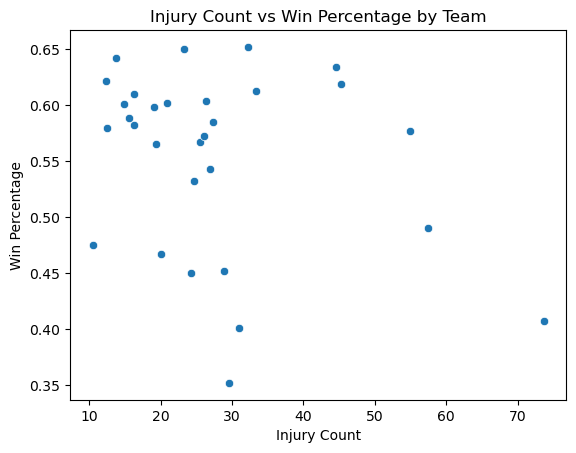

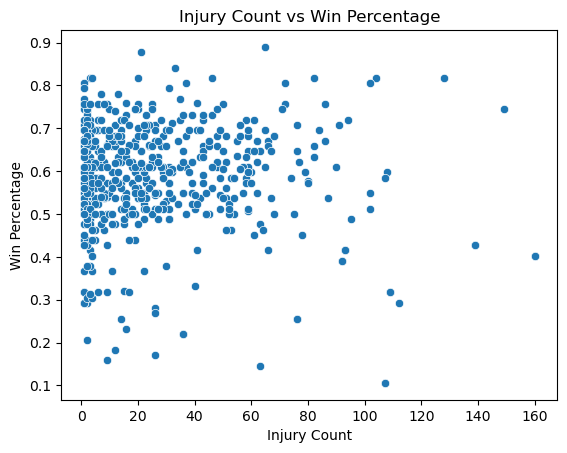

In [5]:
# Step 2: Merge Datasets
def merge_datasets(injuries_df, stats_df, bench_df):
    injuries_count = injuries_df.groupby(['Team', 'Season']).size().reset_index(name='Injury_Count')
    merged = stats_df.merge(injuries_count, on=['Team', 'Season'], how='left')
    merged = merged.merge(bench_df, on=['Team', 'Season'], how='left')
    
    stats_df['Season'] = [int(season) for season in stats_df['Season']]
    
    merged = merged.merge(injury_counts, left_on=['Team', 'Season'], right_on=['Team', 'Year'], how='left')
    
    return merged

merged_df = merge_datasets(injuries_df, team_stats, team_perf)

# testing sample probably want to drop all thhe NaN stuff later?
print(merged_df.sample(n=10))


def plot_injury_vs_win_pct_team(df):
    avg = df.groupby('Team')[['Injury_Count_x','W/L%']].mean().dropna()
    
    plot = sns.scatterplot(data=avg, x='Injury_Count_x', y='W/L%')
    plot.set(xlabel='Injury Count', ylabel='Win Percentage', title='Injury Count vs Win Percentage by Team')
    plt.show()

plot_injury_vs_win_pct_team(merged_df)

def plot_injury_vs_win_pct(df):
    df = df.dropna(subset=['Injury_Count_x', 'W/L%'])

    plot = sns.scatterplot(data=df, x='Injury_Count_x', y='W/L%')
    plot.set(xlabel='Injury Count', ylabel='Win Percentage', title='Injury Count vs Win Percentage')
    plt.show()

plot_injury_vs_win_pct(merged_df)
